# Military Aircraft Classification
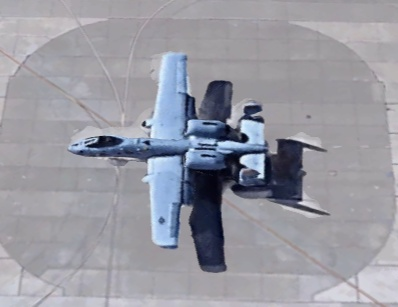 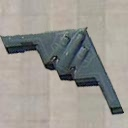 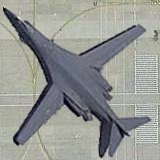

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trainPath="aircraft_dataset/train/"
testPath="aircraft_dataset/test/"

In [3]:
trainData=ImageDataGenerator().flow_from_directory(trainPath,target_size=(224,224)) #VGG16 uses (224,224) 
testData=ImageDataGenerator().flow_from_directory(testPath,target_size=(224,224))
numberofTypes=10

Found 4693 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [5]:
vgg=VGG16()
vggLayers=vgg.layers
vggsize=len(vggLayers)-1 #we will use all layers except the last layer(output layer)
model=Sequential()
for i in range(vggsize):
    model.add(vggLayers[i])



In [6]:
for layer in model.layers:
    layer.trainable=False

model.add(Dense(numberofTypes,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [7]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [9]:
batch_size=4
model.fit_generator(trainData,
                            steps_per_epoch=400//batch_size,
                            epochs=5,
                            validation_data=testData,
                            validation_steps=200//batch_size)

Epoch 1/5
100/100 [==============================] - 463s 5s/step - loss: 1.0526 - accuracy: 0.7047 - val_loss: 0.8538 - val_accuracy: 0.7450
Epoch 2/5
100/100 [==============================] - 445s 4s/step - loss: 0.3300 - accuracy: 0.8906
Epoch 3/5
100/100 [==============================] - 403s 4s/step - loss: 0.2066 - accuracy: 0.9316
Epoch 4/5
100/100 [==============================] - 328s 3s/step - loss: 0.1401 - accuracy: 0.9503
Epoch 5/5
100/100 [==============================] - 326s 3s/step - loss: 0.1075 - accuracy: 0.9649


In [30]:
img=Image.open("test_kc.jpg").resize((224,224))
img=np.array(img)
img=img.reshape(-1,224,224,3)
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


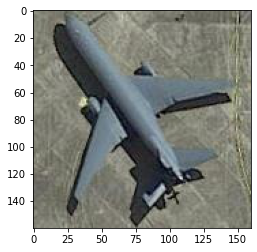

In [31]:
img=preprocess_input(img)
imgDisplay=load_img("test_kc.jpg")
plt.imshow(imgDisplay)
plt.show()

In [32]:
predicate=model.predict(img)
predicate

array([[2.1641546e-09, 1.2690130e-05, 7.6703040e-11, 1.5442214e-07,
        1.1633950e-07, 8.4368487e-08, 2.0404339e-05, 2.9131455e-08,
        1.1383659e-07, 9.9996638e-01]], dtype=float32)

In [33]:
imageClasses=["A-10","B-1","B-2","B-52","C-17",
              "C-130","E-3","F","F-22","KC-10"]
result=np.argmax(predicate[0])
print(imageClasses[result])

KC-10
